In [1]:
pip install pandas numpy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [4]:
data = pd.read_excel('AI_Luxury_Hotel_Survey_Data.xlsx')
print(data.head()) 

  Age Group Frequency of Stay at Luxury Hotels Last Stay in a Luxury Hotel  \
0     45-54       Regularly (3-5 times a year)             7-12 months ago   
1     55-64                         First time             7-12 months ago   
2     35-44                         First time              4-6 months ago   
3     55-64                         First time              1-3 months ago   
4     55-64       Regularly (3-5 times a year)             7-12 months ago   

  Awareness of AI-driven Services  \
0                              No   
1                              No   
2                             Yes   
3                              No   
4                              No   

                            AI-driven Services Used  \
0  AI-driven room service or dining recommendations   
1                                              None   
2                                              None   
3                                              None   
4                 Personalised ro

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



# Convert categories to numeric if not already done
frequency_mapping = {
    'First time': 1,
    'Occasionally (1-2 times a year)': 2,
    'Regularly (3-5 times a year)': 3,
    'Frequently (6+ times a year)': 4
}
data['Frequency of Stay at Luxury Hotels'] = data['Frequency of Stay at Luxury Hotels'].map(frequency_mapping)

# Check if there are any NaN values and fill or drop them
print(data.isnull().sum())  # Show counts of NaNs in each column
data.dropna(inplace=True)  # Remove rows with NaN values

# Ensure all columns are of a numeric type
data['Frequency of Stay at Luxury Hotels'] = pd.to_numeric(data['Frequency of Stay at Luxury Hotels'], errors='coerce')
data['AI Services Improved Satisfaction'] = pd.to_numeric(data['AI Services Improved Satisfaction'], errors='coerce')

# Check data types again
print(data.dtypes)


Age Group                                  0
Frequency of Stay at Luxury Hotels         0
Last Stay in a Luxury Hotel                0
Awareness of AI-driven Services            0
AI-driven Services Used                    0
AI Services Improved Satisfaction          0
AI Services Made Stay More Personalized    0
Quality of Service Enhanced by AI          0
Enjoyment Due to AI Services               0
dtype: int64
Age Group                                  object
Frequency of Stay at Luxury Hotels          int64
Last Stay in a Luxury Hotel                object
Awareness of AI-driven Services            object
AI-driven Services Used                    object
AI Services Improved Satisfaction           int64
AI Services Made Stay More Personalized     int64
Quality of Service Enhanced by AI           int64
Enjoyment Due to AI Services                int64
dtype: object


In [6]:
group1 = data[data['AI-driven Services Used'] == 'Yes']['AI Services Improved Satisfaction'].dropna()
group2 = data[data['AI-driven Services Used'] == 'No']['AI Services Improved Satisfaction'].dropna()


In [7]:
print(f'Group 1 size: {len(group1)}, Group 2 size: {len(group2)}')

Group 1 size: 0, Group 2 size: 0


In [9]:
print(data.describe())


       Frequency of Stay at Luxury Hotels  AI Services Improved Satisfaction  \
count                          100.000000                         100.000000   
mean                             2.530000                           4.330000   
std                              1.123262                           0.739301   
min                              1.000000                           3.000000   
25%                              1.000000                           4.000000   
50%                              3.000000                           4.000000   
75%                              3.000000                           5.000000   
max                              4.000000                           5.000000   

       AI Services Made Stay More Personalized  \
count                               100.000000   
mean                                  4.440000   
std                                   0.686375   
min                                   3.000000   
25%                          

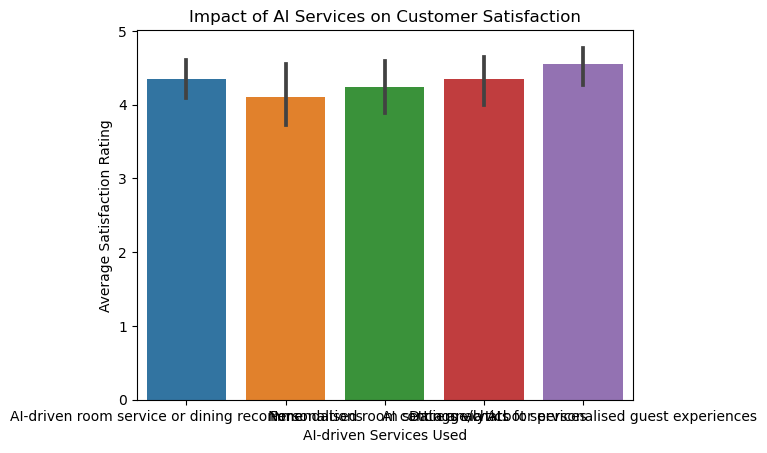

In [10]:
sns.barplot(x='AI-driven Services Used', y='AI Services Improved Satisfaction', data=data)
plt.title('Impact of AI Services on Customer Satisfaction')
plt.xlabel('AI-driven Services Used')
plt.ylabel('Average Satisfaction Rating')
plt.show()


### Histogram
Visualize the distribution of customer satisfaction ratings.

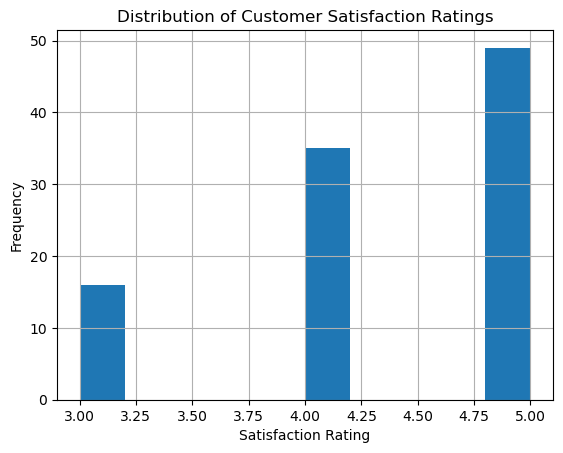

In [11]:
import matplotlib.pyplot as plt

data['AI Services Improved Satisfaction'].hist()
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


### Boxplot
Check for any significant differences in satisfaction ratings across different frequencies of AI service use.

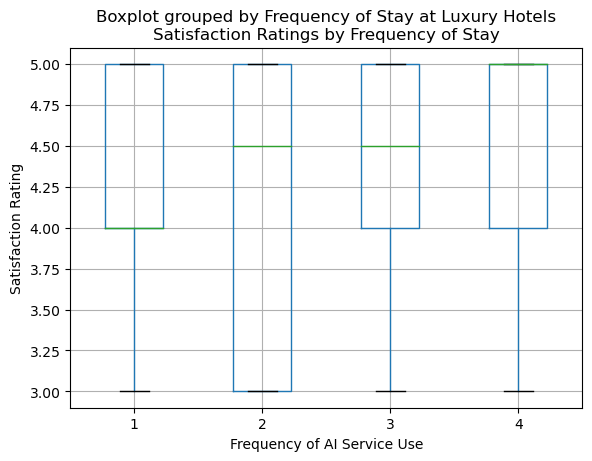

In [12]:
data.boxplot(column='AI Services Improved Satisfaction', by='Frequency of Stay at Luxury Hotels')
plt.title('Satisfaction Ratings by Frequency of Stay')
plt.xlabel('Frequency of AI Service Use')
plt.ylabel('Satisfaction Rating')
plt.show()


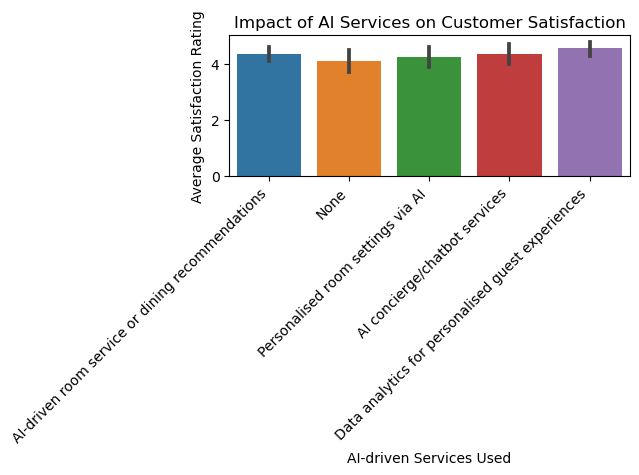

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading and plot (update your actual data variable names accordingly)
sns.barplot(x='AI-driven Services Used', y='AI Services Improved Satisfaction', data=data)
plt.title('Impact of AI Services on Customer Satisfaction')
plt.xlabel('AI-driven Services Used')
plt.ylabel('Average Satisfaction Rating')

# Improve readability: Rotate and adjust labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation

# Display the plot
plt.show()


### Statistical Test
testing whether different levels of AI service use affect satisfaction ratings, use a t-test for two groups or ANOVA for more than two groups.

In [14]:
# Example using ANOVA if you have more than two groups
from scipy.stats import f_oneway

# Assuming you have already mapped 'Frequency of Stay at Luxury Hotels' to integers
groups = data.groupby('Frequency of Stay at Luxury Hotels')['AI Services Improved Satisfaction'].apply(list)
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_stat}, P-value: {p_val}')


ANOVA F-statistic: 0.4746984769537786, P-value: 0.7006295302283594


### Regression analysis

In [15]:
import statsmodels.api as sm

# Define the model
X = sm.add_constant(data['Frequency of Stay at Luxury Hotels'])  # Adds a constant term to the predictor
y = data['AI Services Improved Satisfaction']

model = sm.OLS(y, X).fit()
print(model.summary())


                                    OLS Regression Results                                   
Dep. Variable:     AI Services Improved Satisfaction   R-squared:                       0.002
Model:                                           OLS   Adj. R-squared:                 -0.008
Method:                                Least Squares   F-statistic:                    0.1790
Date:                               Thu, 02 May 2024   Prob (F-statistic):              0.673
Time:                                       22:13:47   Log-Likelihood:                -111.10
No. Observations:                                100   AIC:                             226.2
Df Residuals:                                     98   BIC:                             231.4
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

### Correlation analysis 

                                         Frequency of Stay at Luxury Hotels  \
Frequency of Stay at Luxury Hotels                                 1.000000   
AI Services Improved Satisfaction                                  0.042694   
AI Services Made Stay More Personalized                           -0.004192   
Quality of Service Enhanced by AI                                 -0.046480   
Enjoyment Due to AI Services                                       0.123284   

                                         AI Services Improved Satisfaction  \
Frequency of Stay at Luxury Hotels                                0.042694   
AI Services Improved Satisfaction                                 1.000000   
AI Services Made Stay More Personalized                          -0.010351   
Quality of Service Enhanced by AI                                -0.013061   
Enjoyment Due to AI Services                                      0.121091   

                                         AI Services Mad

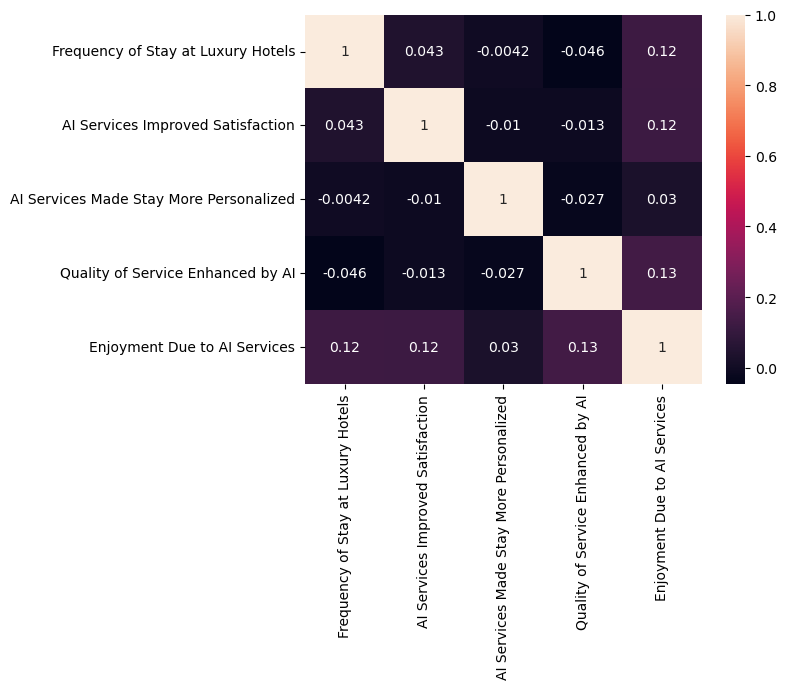

In [16]:
# Calculate correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()
